In [ ]:
inputs = tf.keras.Input(shape = (X_tr.shape[1],))
x = tf.keras.layers.Dense(128, activation = 'relu')(inputs)
x1 = tf.keras.layers.Dense(128, activation = 'relu')(x)
x2 = tf.keras.layers.Dense(128, activation = 'relu')(x1)
x3 = tf.keras.layers.Dense(128, activation = 'relu')(x2)
x4 = tf.keras.layers.Dense(128, activation = 'relu')(x3)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x4)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name = 'auc')
    ]
)

history = model.fit(
    X_tr,
    y_train,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    verbose = False,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 3,
            restore_best_weights = True
        )
    ]
)

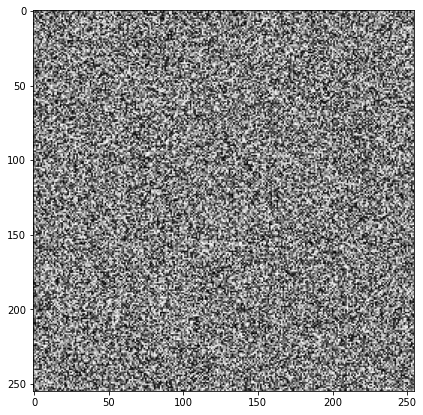

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# generate random numpy array with values from 0 to 255
# and a size of 256x256
random_image = np.random.randint(0, 256, (256, 256))
# initialize plot
plt.figure(figsize = (7, 7))
# show grayscale image, nb: cmap, vmin and vmax
plt.imshow(random_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

In [ ]:
results = model.evaluate(X_te, y_test, verbose = 0)
print('Test Loss: {:.5f}'.format(results[0]))
print('Test Accuracy: {:.2f}%'.format(results[1] * 100))
print('Test ROC AUC: {:.5f}'.format(results[2]))

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
 
# define the neural network model
def define_model(n_input):
	# define model
	model = Sequential()
	# define first hidden layer and visible layer
	model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
	# define output layer
	model.add(Dense(1, activation='sigmoid'))
	# define loss and optimizer
	model.compile(loss='binary_crossentropy', optimizer='sgd')
	return model

# get the model
n_input = X_tr.shape[1]
model = define_model(n_input)
# fit model
weights = {0:1, 1:100}
history = model.fit(X_tr, y_train, class_weight=weights, epochs=100, verbose=0)
# evaluate model
yhat = model.predict(X_te)
score = roc_auc_score(y_test, yhat)
print('ROC AUC: %.3f' % score)